## First import necessary libraries, load the datasets, merge two datasets. 
### This step was already done in data wrangling part

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
train = pd.read_csv('../input/train.csv')
weather = pd.read_csv('../input/weather.csv')
train['Date'] = pd.to_datetime(train['Date'])
weather['Date'] = pd.to_datetime(weather['Date'])
df_train = pd.merge(train, weather, on='Date', how='inner')
df_train

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21007,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,...,,M,M,M,0.00,29.40,30.04,4.1,9,4.6
21008,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,...,BR,0,M,0.0,0.00,29.34,30.04,3.8,8,4.2
21009,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,...,,M,M,M,0.00,29.40,30.04,4.1,9,4.6
21010,2013-09-26,"4200 West 65th Street, Chicago, IL 60621, USA",CULEX PIPIENS/RESTUANS,42,W 65TH ST,T235,"4200 W 65TH ST, Chicago, IL",41.776428,-87.627096,8,...,BR,0,M,0.0,0.00,29.34,30.04,3.8,8,4.2


### Check if the dataframe has null values, NaN values, or duplicate values.

In [2]:
null_values = df_train.isnull().any()
nan_values = df_train.isna().any()
duplicate_columns = df_train.columns[df_train.apply(lambda x: x.duplicated()).any()].tolist()
df_train.columns
df_train=df_train[['Date', 'Species', 'Trap','Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent', 'Tmax', 'Tmin', 'Tavg',
  'Heat', 'Sunrise', 'Sunset', 'Depth', 'SnowFall', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'AvgSpeed' ]]
df_train.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,Heat,Sunrise,Sunset,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,AvgSpeed
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,88,60,74,0,0421,1917,0,0.0,0.00,29.39,30.11,6.5
1,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,88,65,77,0,-,-,M,M,0.00,29.44,30.09,7.4
2,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,88,60,74,0,0421,1917,0,0.0,0.00,29.39,30.11,6.5
3,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,88,65,77,0,-,-,M,M,0.00,29.44,30.09,7.4
4,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0,88,60,74,0,0421,1917,0,0.0,0.00,29.39,30.11,6.5


In [3]:
df_train.columns

Index(['Date', 'Species', 'Trap', 'Latitude', 'Longitude', 'NumMosquitos',
       'WnvPresent', 'Tmax', 'Tmin', 'Tavg', 'Heat', 'Sunrise', 'Sunset',
       'Depth', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'AvgSpeed'],
      dtype='object')

In [4]:
df_train.shape

(21012, 19)

In [5]:
df_train['SnowFall'].unique()

array(['0.0', 'M', '  T'], dtype=object)

In [6]:
df_train['WnvPresent'].unique()

array([0, 1])

In [7]:
df_train['Heat'].unique()

array(['0', '9', '8', '2', '1', '7', '5', '11', '13', '3', '4', '15',
       '10', '14', '12'], dtype=object)

In [8]:
df_train=df_train[['Species','Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent', 'Tmax', 'Tmin', 'Tavg',
 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'AvgSpeed' ]]

In [9]:
df_train.head()

,Species,Latitude,Longitude,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed
0,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,1,0,88,60,74,0.00,29.39,30.11,6.5
1,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,1,0,88,65,77,0.00,29.44,30.09,7.4
2,CULEX RESTUANS,41.954690,-87.800991,1,0,88,60,74,0.00,29.39,30.11,6.5
3,CULEX RESTUANS,41.954690,-87.800991,1,0,88,65,77,0.00,29.44,30.09,7.4
4,CULEX RESTUANS,41.994991,-87.769279,1,0,88,60,74,0.00,29.39,30.11,6.5


In [10]:
df_train['PrecipTotal'].unique()

array(['0.00', '0.42', '0.27', '0.16', '  T', 'M', '1.55', '0.92', '0.01',
       '0.17', '0.04', '1.31', '0.06', '0.09', '0.05', '0.46', '0.23',
       '0.83', '0.37', '0.88', '0.24', '0.20', '0.18', '0.08', '0.12',
       '3.97', '0.87', '0.14', '0.19', '0.02', '0.03', '0.33', '0.95',
       '1.19', '0.89', '0.59', '0.52', '0.44', '0.39', '0.13', '0.70',
       '0.36', '0.79', '0.11', '0.50', '0.84', '0.58'], dtype=object)

In [11]:
df_train['SeaLevel'].unique()

array(['30.11', '30.09', '29.79', '29.78', '30.13', '30.22', '30.21',
       '29.93', '29.92', '29.84', '29.83', '29.90', '29.88', '30.00',
       '29.99', '29.82', '29.80', '29.98', '29.97', '29.95', '30.02',
       '29.76', '29.74', '29.81', '29.89', '29.87', '30.10', '30.08',
       '29.91', '29.94', '29.96', '30.12', '30.06', '30.05', '30.04',
       '30.03', '29.75', '30.07', '30.15', '30.01', '29.70', '29.68',
       '29.77', '29.85', '29.60', '29.59', '29.86', '30.16', '30.14',
       '30.18', '30.17', '30.33', '29.73', '29.71', '29.63', '29.62'],
      dtype=object)

In [12]:
df_train

,Species,Latitude,Longitude,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed
0,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,1,0,88,60,74,0.00,29.39,30.11,6.5
1,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,1,0,88,65,77,0.00,29.44,30.09,7.4
2,CULEX RESTUANS,41.954690,-87.800991,1,0,88,60,74,0.00,29.39,30.11,6.5
3,CULEX RESTUANS,41.954690,-87.800991,1,0,88,65,77,0.00,29.44,30.09,7.4
4,CULEX RESTUANS,41.994991,-87.769279,1,0,88,60,74,0.00,29.39,30.11,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...
21007,CULEX PIPIENS/RESTUANS,41.912563,-87.668055,1,0,75,55,65,0.00,29.40,30.04,4.6
21008,CULEX PIPIENS/RESTUANS,42.009876,-87.807277,5,0,75,50,63,0.00,29.34,30.04,4.2
21009,CULEX PIPIENS/RESTUANS,42.009876,-87.807277,5,0,75,55,65,0.00,29.40,30.04,4.6
21010,CULEX PIPIENS/RESTUANS,41.776428,-87.627096,1,0,75,50,63,0.00,29.34,30.04,4.2


In [13]:
df_train['Species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21012 entries, 0 to 21011
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Species       21012 non-null  object 
 1   Latitude      21012 non-null  float64
 2   Longitude     21012 non-null  float64
 3   NumMosquitos  21012 non-null  int64  
 4   WnvPresent    21012 non-null  int64  
 5   Tmax          21012 non-null  int64  
 6   Tmin          21012 non-null  int64  
 7   Tavg          21012 non-null  object 
 8   PrecipTotal   21012 non-null  object 
 9   StnPressure   21012 non-null  object 
 10  SeaLevel      21012 non-null  object 
 11  AvgSpeed      21012 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.1+ MB


In [15]:
df_train['Tavg'] = pd.to_numeric(df_train['Tavg'], errors='coerce')
df_train['PrecipTotal'] = pd.to_numeric(df_train['PrecipTotal'], errors='coerce')
df_train['StnPressure'] = pd.to_numeric(df_train['StnPressure'], errors='coerce')
df_train['SeaLevel'] = pd.to_numeric(df_train['SeaLevel'], errors='coerce')
df_train['AvgSpeed'] = pd.to_numeric(df_train['AvgSpeed'], errors='coerce')
df_train['WnvPresent'] = pd.to_numeric(df_train['WnvPresent'], errors='coerce')

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21012 entries, 0 to 21011
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Species       21012 non-null  object 
 1   Latitude      21012 non-null  float64
 2   Longitude     21012 non-null  float64
 3   NumMosquitos  21012 non-null  int64  
 4   WnvPresent    21012 non-null  int64  
 5   Tmax          21012 non-null  int64  
 6   Tmin          21012 non-null  int64  
 7   Tavg          21012 non-null  int64  
 8   PrecipTotal   18979 non-null  float64
 9   StnPressure   20919 non-null  float64
 10  SeaLevel      21012 non-null  float64
 11  AvgSpeed      21012 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 2.1+ MB


In [17]:
# df_train = pd.get_dummies(df_train, columns=['Species'], prefix='Species')
# df_train

In [18]:
Train = df_train.groupby(['Latitude', 'Longitude', 'Species'], as_index=False).agg({
    'NumMosquitos': 'sum',
    'Tmax': 'mean',
    'Tmin': 'mean',
    'Tavg': 'mean',
    'PrecipTotal': 'mean',
    'StnPressure': 'mean',
    'SeaLevel': 'mean',
    'AvgSpeed': 'mean',
    'WnvPresent': 'mean',
#     'Species_CULEX ERRATICUS' : 'mean',
#     'Species_CULEX PIPIENS' : 'mean',
#     'Species_CULEX PIPIENS/RESTUANS': 'mean',
#     'Species_CULEX RESTUANS' : 'mean',
#     'Species_CULEX SALINARIUS': 'mean',
#     'Species_CULEX TARSALIS': 'mean',
#     'Species_CULEX TERRITANS': 'mean'
}).set_index(['Latitude', 'Longitude'])

In [19]:
Train

Species  NumMosquitos       Tmax  \
Latitude  Longitude                                                     
41.644612 -87.604498           CULEX PIPIENS           106  86.000000   
          -87.604498  CULEX PIPIENS/RESTUANS           150  86.450000   
          -87.604498          CULEX RESTUANS             2  82.500000   
41.659112 -87.538693           CULEX PIPIENS           932  79.129630   
          -87.538693  CULEX PIPIENS/RESTUANS          1972  81.416667   
...                                      ...           ...        ...   
42.017430 -87.687769           CULEX PIPIENS            52  85.538462   
          -87.687769  CULEX PIPIENS/RESTUANS           224  82.416667   
          -87.687769          CULEX RESTUANS           142  81.125000   
          -87.687769        CULEX SALINARIUS             2  77.000000   
          -87.687769         CULEX TERRITANS             2  86.000000   

                           Tmin       Tavg  PrecipTotal  StnPressure  \
Latitude  Longitude                                                    
41.644612 -87.604498  67.916667  77.333333     0.343333    29.221667   
          -87.604498  67.850000  77.450000     0.216842    29.258500   
          -87.604498  53.500000  68.500000     0.000000    29.365000   
41.659112 -87.538693  62.240741  70.962963     0.115306    29.327037   
          -87.538693  63.601852  72.750000     0.143263    29.289167   
...                         ...        ...          ...          ...   
42.017430 -87.687769  65.538462  75.807692     0.118400    29.252000   
          -87.687769  63.833333  73.366667     0.218333    29.268136   
          -87.687769  62.625000  72.104167     0.250732    29.258936   
          -87.687769  62.500000  70.000000     0.000000    29.255000   
          -87.687769  69.000000  77.500000     0.010000    29.235000   

                       SeaLevel   AvgSpeed  WnvPresent  
Latitude  Longitude                                     
41.644612 -87.604498  29.895833   7.216667    0.000000  
          -87.604498  29.934500   6.480000    0.100000  
          -87.604498  30.035000   5.250000    0.000000  
41.659112 -87.538693  30.002222   8.385185    0.185185  
          -87.538693  29.970000   8.283333    0.055556  
...                         ...        ...         ...  
42.017430 -87.687769  29.928846   7.600000    0.000000  
          -87.687769  29.947167   7.391667    0.000000  
          -87.687769  29.937708   7.883333    0.000000  
          -87.687769  29.925000  11.050000    0.000000  
          -87.687769  29.900000   6.000000    0.000000  

[542 rows x 10 columns]

array([[<Axes: title={'center': 'NumMosquitos'}>,
        <Axes: title={'center': 'Tmax'}>,
        <Axes: title={'center': 'Tmin'}>],
       [<Axes: title={'center': 'Tavg'}>,
        <Axes: title={'center': 'PrecipTotal'}>,
        <Axes: title={'center': 'StnPressure'}>],
       [<Axes: title={'center': 'SeaLevel'}>,
        <Axes: title={'center': 'AvgSpeed'}>,
        <Axes: title={'center': 'WnvPresent'}>]], dtype=object)

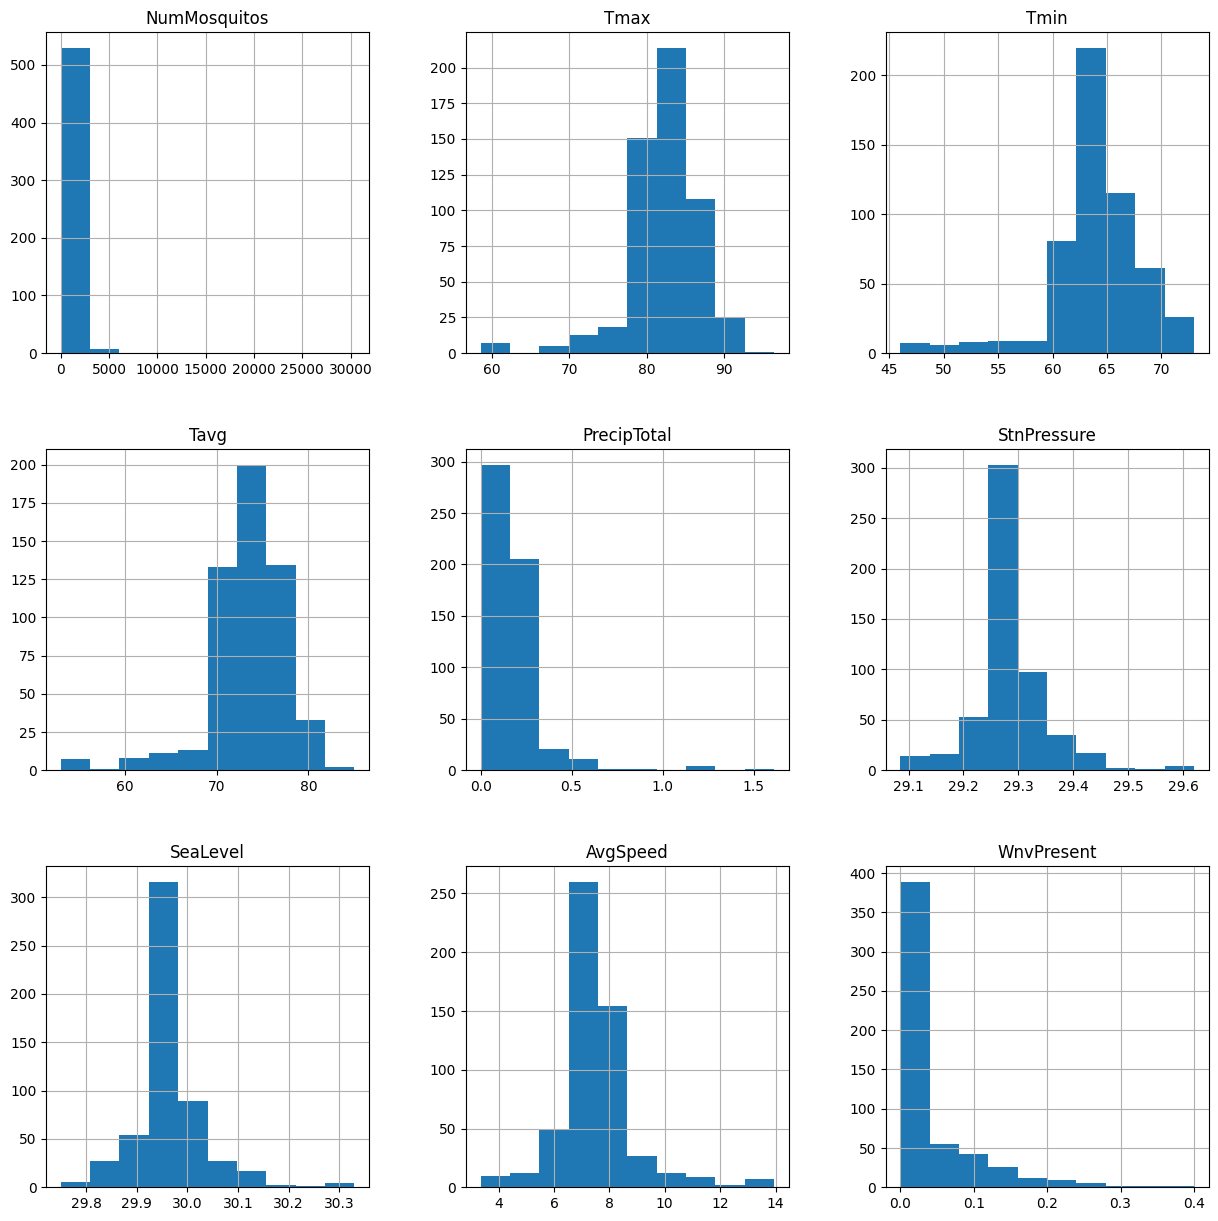

In [20]:
Train.hist(figsize=(15,15))

## Looks like Data is clean now and ready to be analyzed. Next is to see relation between features to know more about our data.

In [21]:
Train.columns

Index(['Species', 'NumMosquitos', 'Tmax', 'Tmin', 'Tavg', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'AvgSpeed', 'WnvPresent'],
      dtype='object')

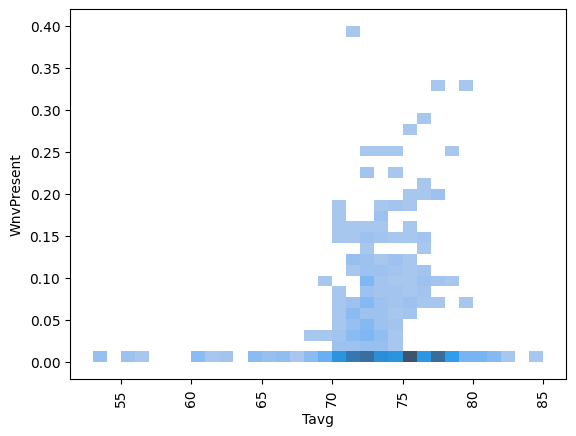

In [22]:
sns.histplot(x='Tavg', y='WnvPresent', data=Train)
plt.xticks(rotation=90)
plt.show()

### Looks like Virus are not present at too low and too high temperature. The favorable temperature for them is from around 68 to around 82.

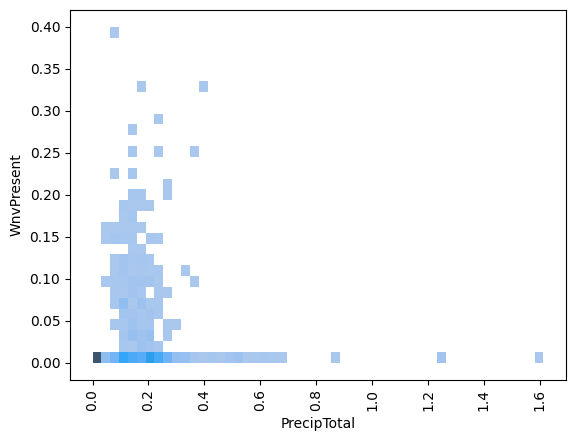

In [23]:
Train.reset_index(inplace=True) 
sns.histplot(x='PrecipTotal', y='WnvPresent', data=Train)
plt.xticks(rotation=90)
plt.show()

### WNV is present in only those locations that have less precipitation rate

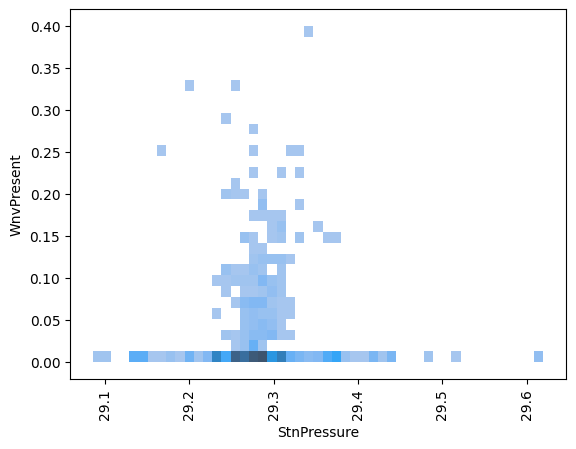

In [24]:
sns.histplot(x='StnPressure', y='WnvPresent', data=Train)
plt.xticks(rotation=90)
plt.show()

### WNV are favorable at pressure between 29.2 to 29.4.

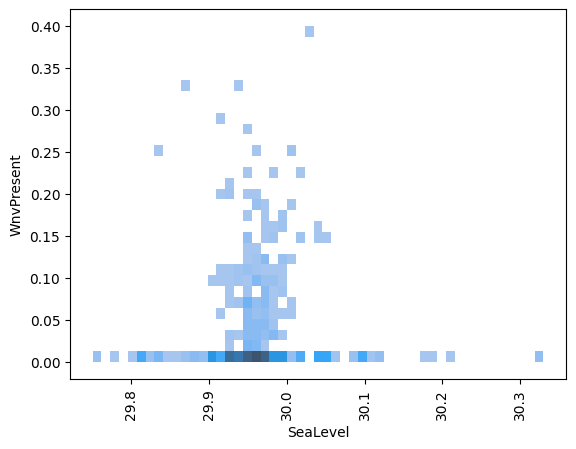

In [25]:
sns.histplot(x='SeaLevel', y='WnvPresent', data=Train)
plt.xticks(rotation=90)
plt.show()

### WNV seems  to present in locations with 29.8 to 30.1 m sealevel.

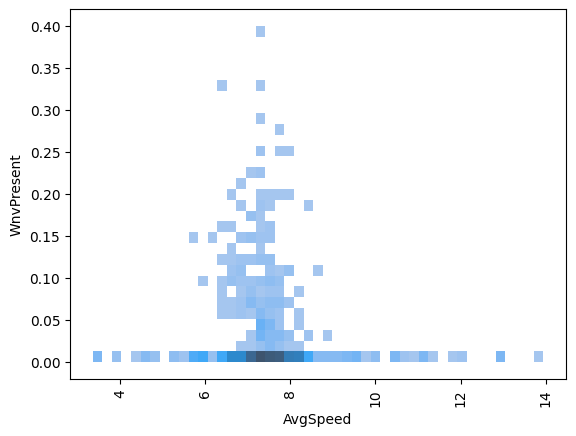

In [26]:
sns.histplot(x='AvgSpeed', y='WnvPresent', data=Train)
plt.xticks(rotation=90)
plt.show()

### Looks like WNV not present at locations with high wind speed greater than 9 miles/hour and at too low wind speed lesser than 5.5 miles/hour

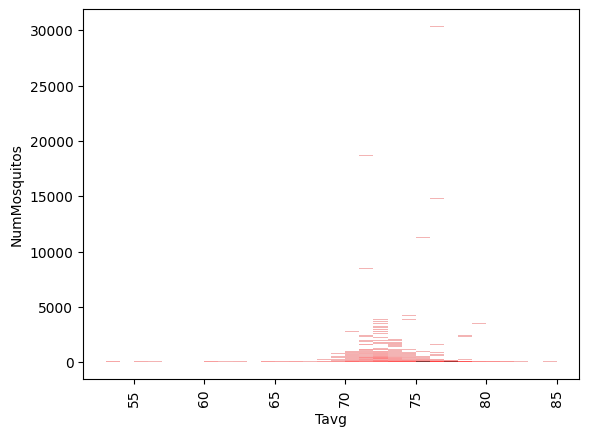

In [27]:
sns.histplot(x='Tavg', y='NumMosquitos', data=Train, color='red', alpha=1)
plt.xticks(rotation=90)
plt.show()

### Almost no Mosquitos outside 68-82 temperature range

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'CULEX PIPIENS'),
  Text(1, 0, 'CULEX PIPIENS/RESTUANS'),
  Text(2, 0, 'CULEX RESTUANS'),
  Text(3, 0, 'CULEX SALINARIUS'),
  Text(4, 0, 'CULEX TERRITANS'),
  Text(5, 0, 'CULEX TARSALIS'),
  Text(6, 0, 'CULEX ERRATICUS')])

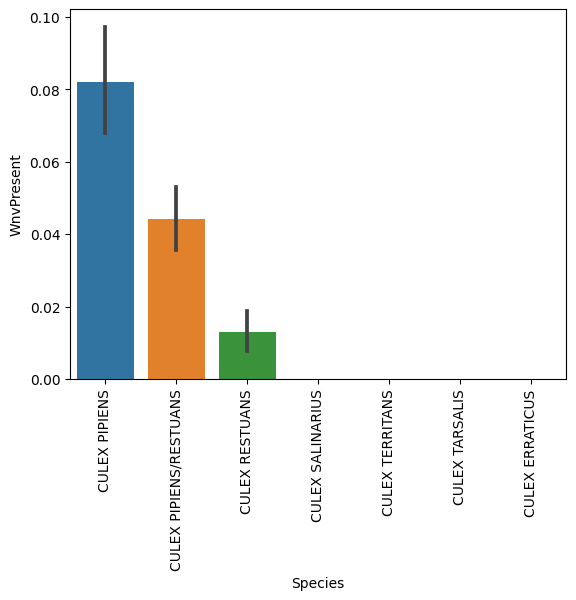

In [28]:
sns.barplot(x='Species', y='WnvPresent', data=Train)
plt.xticks(rotation=90)

## This is good finding that only three types of Culex mosquitoes ('CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', and 'CULEX RESTUANS') can cause Virus

### Keep only those rows containing those three species of mosquitos.

In [29]:
Train = Train[Train['Species'].isin(['CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS'])]

In [30]:
Train

,Latitude,Longitude,Species,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent
0,41.644612,-87.604498,CULEX PIPIENS,106,86.000000,67.916667,77.333333,0.343333,29.221667,29.895833,7.216667,0.000000
1,41.644612,-87.604498,CULEX PIPIENS/RESTUANS,150,86.450000,67.850000,77.450000,0.216842,29.258500,29.934500,6.480000,0.100000
2,41.644612,-87.604498,CULEX RESTUANS,2,82.500000,53.500000,68.500000,0.000000,29.365000,30.035000,5.250000,0.000000
3,41.659112,-87.538693,CULEX PIPIENS,932,79.129630,62.240741,70.962963,0.115306,29.327037,30.002222,8.385185,0.185185
4,41.659112,-87.538693,CULEX PIPIENS/RESTUANS,1972,81.416667,63.601852,72.750000,0.143263,29.289167,29.970000,8.283333,0.055556
...,...,...,...,...,...,...,...,...,...,...,...,...
534,42.011601,-87.811506,CULEX PIPIENS/RESTUANS,814,81.551724,64.465517,73.258621,0.336538,29.265088,29.944655,8.079310,0.103448
535,42.011601,-87.811506,CULEX RESTUANS,276,78.750000,60.027778,69.611111,0.295667,29.265429,29.943333,7.991667,0.000000
537,42.017430,-87.687769,CULEX PIPIENS,52,85.538462,65.538462,75.807692,0.118400,29.252000,29.928846,7.600000,0.000000
538,42.017430,-87.687769,CULEX PIPIENS/RESTUANS,224,82.416667,63.833333,73.366667,0.218333,29.268136,29.947167,7.391667,0.000000
